# Packages & Notebook References

In [ ]:
%pip install mlflow

Python interpreter will be restarted.
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143878 sha256=2c66270012f6620e03a25bb403c0fdfd7579bf5084908f1b4ba7da441986ea22
  Stored in directory: /root/.cache/pip/wheels/b6/90/68/94d223a35a3910c1512a8d42d9f8333ce567ef26e250a56227
Successfully built databricks-cli
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Not uninstalling typing-extensions at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-2a4861ac-a21c-40b8-91c2-921c51fdbb20
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Not uninstalling markupsafe at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-2a4861ac-a21c-40b8-91c2-921c51fdbb20
    Can't uninstall

In [ ]:
%run "/Users/ethan@primeft.com/Public Dataset Exploration/SBA/SBA_etl"


# Libraries


In [ ]:
import mlflow
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import when, lit, udf
from pyspark.sql.types import StringType, FloatType
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
import numpy as np
from dateutil.relativedelta import relativedelta
from datetime import date, datetime
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator


BorrZip ruca_id naics_2 BorrName BorrStreet BorrCity BorrState BankName BankFDICNumber BankNCUANumber BankStreet BankCity BankState BankZip GrossApproval SBAGuaranteedApproval ApprovalDate ApprovalFiscalYear FirstDisbursementDate DeliveryMethod subpgmdesc InitialInterestRate TermInMonths NaicsCode NaicsDescription FranchiseCode FranchiseName ProjectCounty ProjectState SBADistrictOffice CongressionalDistrict BusinessType BusinessAge LoanStatus PaidInFullDate ChargeOffDate GrossChargeOffAmount RevolverStatus JobsSupported SOLDSECMRTIND entity_id pct_gov_secured BankCity_eq_BorrCity_flag BankState_eq_BorrState_flag BankZip_eq_BorrZip_flag days_to_disbursement est_maturity_date actual_maturity_date diff_est_actual_maturity_date franchise_flag naics_3 naics_2_desc ruca_description Borr_lat Borr_lng Borr_county_fips Borr_county_name Borr_military_county_flag total_inflation_pct T_0y_naics_county_gdp_per_capita T_0y_naics_county_avg_income T_0y_naics_county_diff_gdp_vs_state_avg T_1y_prior_naics_county_gdp_per_capita T_1y_prior_naics_county_avg_income T_1y_prior_naics_county_diff_gdp_vs_state_avg 82717 4 21 WATER SYSTEM MANAGEMENT 2290 WOLFF ROAD GILLETTE WY Wells Fargo Bank, National Association 3511 null 101 N Philips Ave SIOUX FALLS SD 57104 265000.0 198750.0 1995-12-04 1996 1996-01-31 OTH 7A Contract Guaranty null 5 213112 Support Activities for Oil and Gas Operations null null null WY WYOMING DISTRICT OFFICE 0 INDIVIDUAL null 0 2005-07-31 null 0 0 0 null E000ff6de000001c6b 75.0 0 0 0 58 1996-06-30 2005-07-31 -3318 0 213 Mining, Quarrying, and Oil and Gas Extraction Micropolitan area core: primary flow within an Urban Cluster of 10,000 to 49,999 (large UC) null null null null null 1.2395275073826972 null null null null null null 99687 4 23 MAT VALLEY MAINTENANCE 5141 BEVERLY LAKE ROAD WASILLA AK Wells Fargo Bank, National Association 3511 null 101 N Philips Ave SIOUX FALLS SD 57104 25000.0 20000.0 1998-08-04 1998 1998-08-31 OTH 7A Guaranty null 60 235110 Plumbing, Heating, and Air Conditioning Contractors null null MATANUSKA SUSITNA AK ALASKA DISTRICT OFFICE 0 INDIVIDUAL null 0 2008-04-30 null 0 0 0 null E0025e64b00001f657 80.0 0 0 0 27 2003-08-31 2008-04-30 -1704 0 235 Construction Micropolitan area core: primary flow within an Urban Cluster of 10,000 to 49,999 (large UC) null null null null null 1.2917189284601804 null null null null null null 08870 1 23 VAIL ENERGY SERVICES LLC 21 COUNTY LINE ROAD READINGTON NJ PNC Bank, National Association 6384 null 222 Delaware Ave WILMINGTON DE 19801 315000.0 236250.0 1998-03-12 1998 1998-04-07 OTH 7A Guaranty null 87 235110 Plumbing, Heating, and Air Conditioning Contractors null null HUNTERDON NJ NEW JERSEY DISTRICT OFFICE 7 CORPORATION null 0 2005-05-31 null 0 0 0 Y E0025e5e020001457c 75.0 0 0 0 26 2005-07-07 2005-05-31 37 0 235 Construction Metropolitan area core: primary flow within an urbanized area (UA) null null null null null 1.1767210050877375 null null null null null null 99120 null 23 A-1 CONCRETE CUTTING 4518 E. FOURTH AVE., SPOKANE, WA Banner Bank 28489 null 10 S First Ave WALLA WALLA WA 99362 55742.0 44594.0 1998-10-28 1999 1999-01-31 OTH 7A Guaranty null 120 235710 Concrete Contractors null null SPOKANE WA SPOKANE BRANCH OFFICE 1 INDIVIDUAL null 0 2005-07-31 null 0 0 0 Y E0025e62e40001e6b7 80.00071759176204 0 1 0 95 2009-01-31 2005-07-31 1280 0 235 Construction null null null null null null 1.1587342160421243 null null null null null null 03041 1 23 T-REX INCORPORATED 1 LANE ROAD EAST DERRY NH Bank of America, National Association 3510 null 100 N Tryon St, Ste 170 CHARLOTTE NC 28202 368100.0 276075.0 2001-09-26 2001 2001-10-31 PLP Guaranty null 60 235940 Wrecking and Demolition Contractors null null ROCKINGHAM NH NEW HAMPSHIRE DISTRICT OFFICE 1 CORPORATION null 0 2005-05-31 null 0 0 26 null E0025e9c00007ed3 75.0 0 0 0 35 2006-10-31 2005-05-31 518 0 235 Construction Metropolitan area core: primary flow within an urbanized area (UA) null null null null null 1.096883468834688 


# Helper Functions

In [ ]:
mlflow.pyspark.ml.autolog()

# Used to extract probability of chargeoff from VectorType predictions columns
def ith_(v, i):
    try:
        return float(v[i])
    except ValueError:
        return None
ith = udf(ith_, DoubleType())

# Used to remove a set of columns from a dataframe from list input
def remove_columns(dataframe):
    return dataframe.select([col for col in dataframe.columns if col not in remove_cols])

# Builds either a Logistic Regression or Random Forest PySpark model
def create_model(model,training, testing,prob_threshold):
    training = training.na.drop()
    testing = testing.na.drop()

    categorical_columns = []
    vector_columns = []
    for column_name in training.columns:
        column_data_type = training.schema[column_name].dataType
        if isinstance(column_data_type, StringType):
            categorical_columns.append(column_name)
        else:
            vector_columns.append(column_name)
    # Create a list to hold the stages of the pipeline
    stages = []

    # Iterate through categorical columns
    for col_name in categorical_columns:
        # Calculate the number of distinct values in the column
        distinct_count = training.select(col_name).distinct().count()
        
        # Set a threshold for deciding whether to use StringIndexer or OneHotEncoder
        threshold = 15
        
        if distinct_count <= threshold:
            # Use OneHotEncoder for low cardinality columns
            indexer = StringIndexer(inputCol=col_name, outputCol=col_name + "_index", handleInvalid="keep")
            stages.append(indexer)
            encoder = OneHotEncoder(inputCol=col_name + "_index", outputCol=col_name + "_encoded")
            stages.append(encoder)
            vector_columns.append(col_name + "_encoded")

    vector_columns.remove('LoanStatus')

    assembler = VectorAssembler(inputCols=vector_columns,
                                    outputCol='features')
    stages.append(assembler)
    if model=='lr':
        log_reg = LogisticRegression(featuresCol='features',
                                labelCol='LoanStatus')
        stages.append(log_reg)
    elif model=='rf':
        random_forest = RandomForestClassifier(numTrees=100,labelCol="LoanStatus", featuresCol="features").setThresholds([0.1,0.9])
        stages.append(random_forest)

    pipeline = Pipeline(stages=stages)

    model = pipeline.fit(training)
  
    # Storing the results on test data
    predictions = model.transform(testing)

    if prob_threshold!=None:
        predictions = predictions.withColumn("prediction", when(ith("probability", lit(1))>=prob_threshold, 1).otherwise(0))
        predictions = predictions.withColumn("prediction", f.col("prediction").cast(DoubleType()))
        
    return model, predictions


In [ ]:
# Returns ROC AUC, Accuracy, Recall, and a Confusion Matrix for a given model and set of predictions
def report_metrics(model_type,model,predictions,training,testing):
    if model_type=='lr':
        evaluator = MulticlassClassificationEvaluator(labelCol='LoanStatus',metricName="accuracy")
        accuracy = evaluator.evaluate(predictions)
        print("Test Accuracy = {:.2f}".format(accuracy))

        res = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='LoanStatus')
        ROC_AUC = res.evaluate(predictions)
        print("ROC AUC = {:.2f}".format(ROC_AUC))

        evaluator3 = MulticlassClassificationEvaluator(labelCol="LoanStatus", predictionCol="prediction", metricName="weightedRecall")

        # Calculate the recall
        recall = evaluator.evaluate(predictions)

        print("Recall:", recall)

        tp = predictions.filter((predictions.LoanStatus == 1) & (predictions.prediction == 1)).count()
        tn = predictions.filter((predictions.LoanStatus == 0) & (predictions.prediction == 0)).count()
        fp = predictions.filter((predictions.LoanStatus == 0) & (predictions.prediction == 1)).count()
        fn = predictions.filter((predictions.LoanStatus == 1) & (predictions.prediction == 0)).count()

        total_count = predictions.count()

        # Create a confusion matrix
        confusion_matrix = np.array([[tn, fp], [fn, tp]])

        
        # Plot the confusion matrix
        plt.figure(figsize=(16, 10))
        cmap = plt.get_cmap("Blues")
        plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
        plt.yticks([0, 1], ['True 0', 'True 1'])
        plt.xlabel('Predicted')
        plt.ylabel('True')

        # Add count and percentage labels
        for i in range(2):
            for j in range(2):
                plt.text(j, i, f'Count: {confusion_matrix[i, j]}\nPercentage: {confusion_matrix[i, j] / total_count:.2%}',
                        horizontalalignment="center", color="black",fontsize=16)

        plt.show()

    elif model_type=='rf':
        feature_columns = [col for col in training.columns if col != 'LoanStatus']
        rf_model = model.stages[-1]  # Access the RandomForest model from the pipeline
        feature_importances = list(rf_model.featureImportances.toArray())

        # Pair feature names with their corresponding importances
        feature_importance_pairs = list(zip(feature_columns, feature_importances))

        # Sort feature importances by importance score (descending order)
        sorted_feature_importances = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

        # Print sorted feature importances
        for feature, importance in sorted_feature_importances:
            print(f"Feature '{feature}': Importance = {importance:.4f}")

        tp = predictions.filter((predictions.LoanStatus == 1) & (predictions.prediction == 1)).count()
        tn = predictions.filter((predictions.LoanStatus == 0) & (predictions.prediction == 0)).count()
        fp = predictions.filter((predictions.LoanStatus == 0) & (predictions.prediction == 1)).count()
        fn = predictions.filter((predictions.LoanStatus == 1) & (predictions.prediction == 0)).count()

        total_count = predictions.count()

        # Create a confusion matrix
        confusion_matrix = np.array([[tn, fp], [fn, tp]])

        
        # Plot the confusion matrix
        plt.figure(figsize=(16, 10))
        cmap = plt.get_cmap("Blues")
        plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
        plt.title('Confusion Matrix')
        plt.colorbar()
        plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
        plt.yticks([0, 1], ['True 0', 'True 1'])
        plt.xlabel('Predicted')
        plt.ylabel('True')

        # Add count and percentage labels
        for i in range(2):
            for j in range(2):
                plt.text(j, i, f'Count: {confusion_matrix[i, j]}\nPercentage: {confusion_matrix[i, j] / total_count:.2%}',
                        horizontalalignment="center", color="black",fontsize=16)

        plt.show()

        evaluator = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="LoanStatus", metricName="areaUnderROC")

        # Calculate the ROC AUC
        roc_auc = evaluator.evaluate(predictions)

        print("ROC AUC:", roc_auc)

        evaluator2 = MulticlassClassificationEvaluator(labelCol="LoanStatus", predictionCol="prediction", metricName="accuracy")

        # Calculate the accuracy
        accuracy = evaluator2.evaluate(predictions)

        print("Accuracy:", accuracy)

        # Calculate the recall
        evaluator3 = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="LoanStatus", metricName="recallByLabel")
        recall = evaluator3.evaluate(predictions, {evaluator3.metricLabel: 1.0})

        print("Recall:", recall)

# Random Forest / 2017+ non-revolving loans / random 80-20 split / threshold = 0.2

## 1. SBA Loan Features Only

In [ ]:
model_df = df

revolving_flag = False
if revolving_flag==False:
    model_df = model_df.filter(f.col('RevolverStatus')==0)
    model_df = model_df.drop('RevolverStatus')
    model_df = model_df.filter(f.col('ApprovalDate')>date(2017,1,1))

remove_cols = ['BorrName','BorrStreet','BorrCity','BorrZip','BankName','BankFDICNumber','BankNCUANumber','BankStreet',
              'BankCity','BankState','BankZip','ApprovalFiscalYear','FirstDisbursementDate','NaicsCode',
              'NaicsDescription','FranchiseCode','FranchiseName','ProjectCounty','ProjectState','SBADistrictOffice',
              'CongressionalDistrict','BusinessAge','PaidInFullDate','ChargeOffDate','GrossChargeOffAmount', 'SOLDSECMRTIND',
              'entity_id', 'est_maturity_date','actual_maturity_date', 'Borr_lat','Borr_lng','Borr_county_fips','Borr_county_name',
              'JobsSupported','ApprovalDate','naics_2_desc','ruca_description','InitialInterestRate']

remove_cols.extend(['ruca_id','BankCity_eq_BorrCity_flag','BankZip_eq_BorrZip_flag','days_to_disbursement','diff_est_actual_maturity_date','Borr_military_county_flag','total_inflation_pct','BankState_eq_BorrState_flag','pct_gov_secured','T_0y_naics_county_gdp_per_capita','T_0y_naics_county_avg_income', 'T_0y_naics_county_diff_gdp_vs_state_avg','T_1y_prior_naics_county_gdp_per_capita','T_1y_prior_naics_county_avg_income','T_1y_prior_naics_county_diff_gdp_vs_state_avg'])

model_df = remove_columns(model_df)

pif = model_df.filter(model_df["LoanStatus"]==0)
chargeoff = model_df.filter(model_df["LoanStatus"]==1)

train0, test0 = pif.randomSplit([0.8,0.2], seed=42)
train1, test1 = chargeoff.randomSplit([0.8,0.2], seed=42)

train_data = train0.union(train1)
test_data = test0.union(test1)

for i in train_data.columns:
    print(i)


naics_2
BorrState
GrossApproval
SBAGuaranteedApproval
DeliveryMethod
subpgmdesc
TermInMonths
BusinessType
LoanStatus
franchise_flag
naics_3


2023/09/11 20:17:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '6903f55c2db54be8b2090ce142b3916f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/09/11 20:17:36 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/local_disk0/.ephemeral_nfs/envs/pythonEnv-0dd2be21-cf7a-49c2-b349-03711bde40c6/lib/python3.9/site-packages/mlflow/data/spark_dataset.py:156: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these column

2023/09/11 20:18:17 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Feature 'GrossApproval': Importance = 0.5570
Feature 'naics_2': Importance = 0.1316
Feature 'BorrState': Importance = 0.1281
Feature 'subpgmdesc': Importance = 0.0449
Feature 'DeliveryMethod': Importance = 0.0310
Feature 'SBAGuaranteedApproval': Importance = 0.0226
Feature 'BusinessType': Importance = 0.0177
Feature 'TermInMonths': Importance = 0.0031
Feature 'franchise_flag': Importance = 0.0004
Feature 'naics_3': Importance = 0.0000


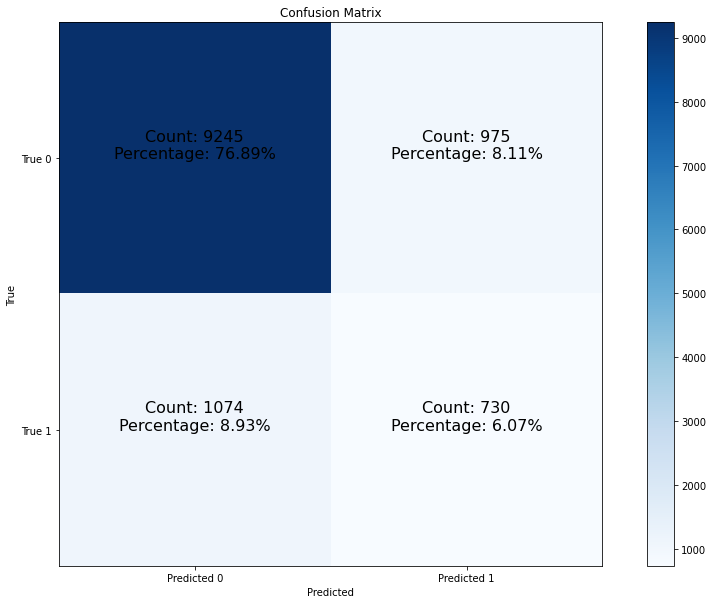

ROC AUC: 0.6546275725610842
Accuracy: 0.8295908183632734
Recall: 0.40465631929046564


In [ ]:
# Adjust prob_threshold to increase/decrease ChargeOff predictions, lower threshold = greater ChargeOff predictions
rf_mod_2017, rf_pred_2017 = create_model(model='rf',training=train_data, testing=test_data, prob_threshold=0.2)

report_metrics('rf',rf_mod_2017,rf_pred_2017,train_data,test_data)


## 2. SBA + Feature Eng

In [ ]:
model_df = df

revolving_flag = False
if revolving_flag==False:
    model_df = model_df.filter(f.col('RevolverStatus')==0)
    model_df = model_df.drop('RevolverStatus')
    model_df = model_df.filter(f.col('ApprovalDate')>date(2017,1,1))

remove_cols = ['BorrName','BorrStreet','BorrCity','BorrZip','BankName','BankFDICNumber','BankNCUANumber','BankStreet',
              'BankCity','BankState','BankZip','ApprovalFiscalYear','FirstDisbursementDate','NaicsCode',
              'NaicsDescription','FranchiseCode','FranchiseName','ProjectCounty','ProjectState','SBADistrictOffice',
              'CongressionalDistrict','BusinessAge','PaidInFullDate','ChargeOffDate','GrossChargeOffAmount', 'SOLDSECMRTIND',
              'entity_id', 'est_maturity_date','actual_maturity_date', 'Borr_lat','Borr_lng','Borr_county_fips','Borr_county_name',
              'JobsSupported','ApprovalDate','naics_2_desc','ruca_description','InitialInterestRate']

remove_cols.extend(['ruca_id','diff_est_actual_maturity_date','Borr_military_county_flag','total_inflation_pct','T_0y_naics_county_gdp_per_capita','T_0y_naics_county_avg_income', 'T_0y_naics_county_diff_gdp_vs_state_avg','T_1y_prior_naics_county_gdp_per_capita','T_1y_prior_naics_county_avg_income','T_1y_prior_naics_county_diff_gdp_vs_state_avg'])

model_df = remove_columns(model_df)

pif = model_df.filter(model_df["LoanStatus"]==0)
chargeoff = model_df.filter(model_df["LoanStatus"]==1)

train0, test0 = pif.randomSplit([0.8,0.2], seed=42)
train1, test1 = chargeoff.randomSplit([0.8,0.2], seed=42)

train_data = train0.union(train1)
test_data = test0.union(test1)

for i in train_data.columns:
    print(i)


print(train_data.count())

naics_2
BorrState
GrossApproval
SBAGuaranteedApproval
DeliveryMethod
subpgmdesc
TermInMonths
BusinessType
LoanStatus
pct_gov_secured
BankCity_eq_BorrCity_flag
BankState_eq_BorrState_flag
BankZip_eq_BorrZip_flag
days_to_disbursement
franchise_flag
naics_3
49228


2023/09/11 20:19:38 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '523cac85867942b0b3430263c6fa8095', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/09/11 20:19:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/local_disk0/.ephemeral_nfs/envs/pythonEnv-0dd2be21-cf7a-49c2-b349-03711bde40c6/lib/python3.9/site-packages/mlflow/data/spark_dataset.py:156: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these column

2023/09/11 20:20:19 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Feature 'GrossApproval': Importance = 0.5698
Feature 'SBAGuaranteedApproval': Importance = 0.0760
Feature 'naics_2': Importance = 0.0741
Feature 'subpgmdesc': Importance = 0.0680
Feature 'BorrState': Importance = 0.0637
Feature 'BankCity_eq_BorrCity_flag': Importance = 0.0319
Feature 'BankState_eq_BorrState_flag': Importance = 0.0241
Feature 'pct_gov_secured': Importance = 0.0118
Feature 'BusinessType': Importance = 0.0064
Feature 'days_to_disbursement': Importance = 0.0060
Feature 'BankZip_eq_BorrZip_flag': Importance = 0.0017
Feature 'TermInMonths': Importance = 0.0012
Feature 'DeliveryMethod': Importance = 0.0012
Feature 'franchise_flag': Importance = 0.0001
Feature 'naics_3': Importance = 0.0000


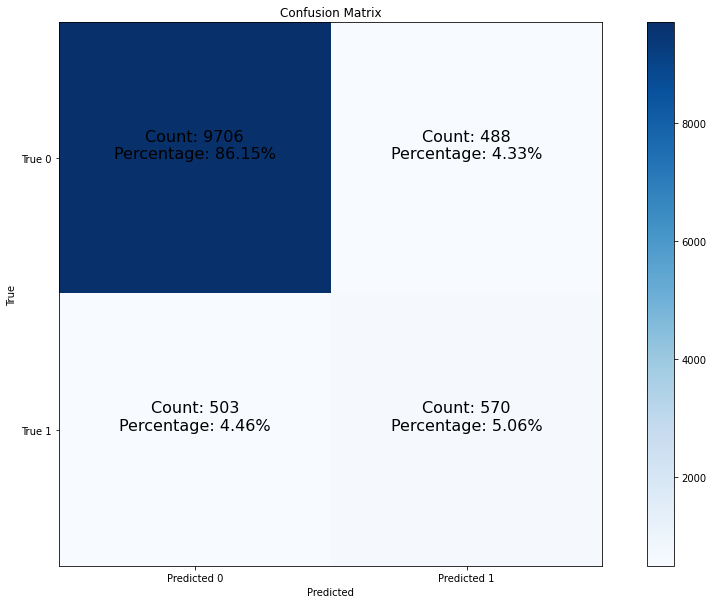

ROC AUC: 0.7416747896035916
Accuracy: 0.9120440223662022
Recall: 0.5312208760484622


In [ ]:
rf_mod_2017_2, rf_pred_2017_2 = create_model(model='rf',training=train_data, testing=test_data, prob_threshold=0.2)

report_metrics('rf',rf_mod_2017_2,rf_pred_2017_2,train_data,test_data)


## 3. SBA + Feature Eng + Public Data

In [ ]:
model_df = df

revolving_flag = False
if revolving_flag==False:
    model_df = model_df.filter(f.col('RevolverStatus')==0)
    model_df = model_df.drop('RevolverStatus')
    model_df = model_df.filter(f.col('ApprovalDate')>date(2017,1,1))

remove_cols = ['BorrName','BorrStreet','BorrCity','BorrZip','BankName','BankFDICNumber','BankNCUANumber','BankStreet',
              'BankCity','BankState','BankZip','ApprovalFiscalYear','FirstDisbursementDate','NaicsCode',
              'NaicsDescription','FranchiseCode','FranchiseName','ProjectCounty','ProjectState','SBADistrictOffice',
              'CongressionalDistrict','BusinessAge','PaidInFullDate','ChargeOffDate','GrossChargeOffAmount', 'SOLDSECMRTIND',
              'entity_id', 'est_maturity_date','actual_maturity_date', 'Borr_lat','Borr_lng','Borr_county_fips','Borr_county_name',
              'JobsSupported','ApprovalDate','naics_2_desc','ruca_description','InitialInterestRate']

remove_cols.extend(['diff_est_actual_maturity_date','T_0y_naics_county_gdp_per_capita','T_0y_naics_county_avg_income',
                    'T_0y_naics_county_diff_gdp_vs_state_avg','T_1y_prior_naics_county_gdp_per_capita','T_1y_prior_naics_county_avg_income','T_1y_prior_naics_county_diff_gdp_vs_state_avg'])

model_df = remove_columns(model_df)

pif = model_df.filter(model_df["LoanStatus"]==0)
chargeoff = model_df.filter(model_df["LoanStatus"]==1)

train0, test0 = pif.randomSplit([0.8,0.2], seed=42)
train1, test1 = chargeoff.randomSplit([0.8,0.2], seed=42)

train_data = train0.union(train1)
test_data = test0.union(test1)

for i in train_data.columns:
    print(i)


print(train_data.count())

ruca_id
naics_2
BorrState
GrossApproval
SBAGuaranteedApproval
DeliveryMethod
subpgmdesc
TermInMonths
BusinessType
LoanStatus
pct_gov_secured
BankCity_eq_BorrCity_flag
BankState_eq_BorrState_flag
BankZip_eq_BorrZip_flag
days_to_disbursement
franchise_flag
naics_3
Borr_military_county_flag
total_inflation_pct
49183


Feature 'BorrState': Importance = 0.4404
Feature 'BankCity_eq_BorrCity_flag': Importance = 0.1719
Feature 'GrossApproval': Importance = 0.0761
Feature 'ruca_id': Importance = 0.0653
Feature 'naics_2': Importance = 0.0587
Feature 'DeliveryMethod': Importance = 0.0459
Feature 'BusinessType': Importance = 0.0141
Feature 'TermInMonths': Importance = 0.0088
Feature 'BankState_eq_BorrState_flag': Importance = 0.0060
Feature 'subpgmdesc': Importance = 0.0043
Feature 'SBAGuaranteedApproval': Importance = 0.0025
Feature 'naics_3': Importance = 0.0016
Feature 'BankZip_eq_BorrZip_flag': Importance = 0.0006
Feature 'days_to_disbursement': Importance = 0.0006
Feature 'total_inflation_pct': Importance = 0.0002
Feature 'Borr_military_county_flag': Importance = 0.0001
Feature 'franchise_flag': Importance = 0.0001
Feature 'pct_gov_secured': Importance = 0.0000


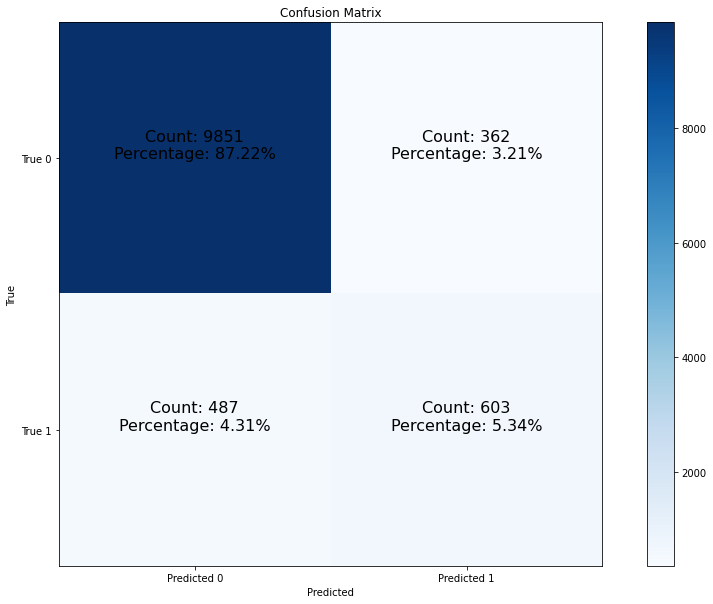

ROC AUC: 0.7651309294646029
Accuracy: 0.9248273419514786
Recall: 0.5667574931880109


In [ ]:
rf_mod_2017_3, rf_pred_2017_3 = create_model(model='rf',training=train_data, testing=test_data, prob_threshold=0.2)

report_metrics('rf',rf_mod_2017_3,rf_pred_2017_3,train_data,test_data)


## 4. + Revenue

In [ ]:
model_df = df_enigma_filled

revolving_flag = False
if revolving_flag==False:
    model_df = model_df.filter(f.col('RevolverStatus')==0)
    model_df = model_df.drop('RevolverStatus')
    model_df = model_df.filter(f.col('ApprovalDate')>date(2017,1,1))

remove_cols = ['BorrName','BorrStreet','BorrCity','BorrZip','BankName','BankFDICNumber','BankNCUANumber','BankStreet',
              'BankCity','BankState','BankZip','ApprovalFiscalYear','FirstDisbursementDate','NaicsCode',
              'NaicsDescription','FranchiseCode','FranchiseName','ProjectCounty','ProjectState','SBADistrictOffice',
              'CongressionalDistrict','BusinessAge','PaidInFullDate','ChargeOffDate','GrossChargeOffAmount', 'SOLDSECMRTIND',
              'entity_id', 'est_maturity_date','actual_maturity_date', 'Borr_lat','Borr_lng','Borr_county_fips','Borr_county_name',
              'JobsSupported','ApprovalDate','naics_2_desc','ruca_description','InitialInterestRate']


remove_cols.extend(['diff_est_actual_maturity_date','T_0y_naics_county_gdp_per_capita','T_0y_naics_county_avg_income',
                    'T_0y_naics_county_diff_gdp_vs_state_avg','T_1y_prior_naics_county_gdp_per_capita','T_1y_prior_naics_county_avg_income','T_1y_prior_naics_county_diff_gdp_vs_state_avg'])

remove_cols.extend(['T_0m_approval_date_revenue','T_1m_future_revenue','T_2m_future_revenue','T_3m_future_revenue','T_4m_future_revenue','T_5m_future_revenue','T_6m_future_revenue','T_7m_future_revenue','T_8m_future_revenue','T_9m_future_revenue','rev_growth_3m_future','T_1m_prior_revenue','T_2m_prior_revenue','T_7m_prior_revenue','T_8m_prior_revenue','T_9m_prior_revenue','rev_growth_6m_4m_prior','rev_growth_9m_4m_prior','T_3m_prior_revenue','pct_revenue_to_loan_amount','pct_revenue_to_monthly_payment','rev_growth_3m_prior'])

remove_cols.extend(['earliest_revenue_record','months_revenue_before_approval','total_business_locations','has_us_website','has_international_website','bankruptcy_flag','ucc_filing_count','total_active_months'])

model_df = remove_columns(model_df)

model_df = model_df.na.drop()

pif = model_df.filter(model_df["LoanStatus"]==0)
chargeoff = model_df.filter(model_df["LoanStatus"]==1)

train0, test0 = pif.randomSplit([0.8,0.2], seed=42)
train1, test1 = chargeoff.randomSplit([0.6,0.4], seed=42)

train_data = train0.union(train1)
test_data = test0.union(test1)

for i in train_data.columns:
    print(i)


ruca_id
naics_2
BorrState
GrossApproval
SBAGuaranteedApproval
DeliveryMethod
subpgmdesc
TermInMonths
BusinessType
LoanStatus
pct_gov_secured
BankCity_eq_BorrCity_flag
BankState_eq_BorrState_flag
BankZip_eq_BorrZip_flag
days_to_disbursement
franchise_flag
naics_3
Borr_military_county_flag
total_inflation_pct
T_4m_prior_revenue
T_5m_prior_revenue
T_6m_prior_revenue


2023/09/14 00:49:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f3d158172bf545bb865a667f57009ca2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/09/14 00:49:17 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/local_disk0/.ephemeral_nfs/envs/pythonEnv-ace99566-be48-4ac1-98c8-682cd0c39932/lib/python3.9/site-packages/mlflow/data/spark_dataset.py:159: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these column

2023/09/14 01:12:48 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Feature 'BankCity_eq_BorrCity_flag': Importance = 0.3479
Feature 'BorrState': Importance = 0.2559
Feature 'GrossApproval': Importance = 0.0444
Feature 'ruca_id': Importance = 0.0422
Feature 'DeliveryMethod': Importance = 0.0409
Feature 'naics_2': Importance = 0.0383
Feature 'TermInMonths': Importance = 0.0329
Feature 'BankZip_eq_BorrZip_flag': Importance = 0.0314
Feature 'days_to_disbursement': Importance = 0.0221
Feature 'BankState_eq_BorrState_flag': Importance = 0.0187
Feature 'BusinessType': Importance = 0.0079
Feature 'franchise_flag': Importance = 0.0077
Feature 'Borr_military_county_flag': Importance = 0.0026
Feature 'naics_3': Importance = 0.0023
Feature 'T_4m_prior_revenue': Importance = 0.0016
Feature 'subpgmdesc': Importance = 0.0015
Feature 'SBAGuaranteedApproval': Importance = 0.0013
Feature 'total_inflation_pct': Importance = 0.0007
Feature 'T_6m_prior_revenue': Importance = 0.0005
Feature 'T_5m_prior_revenue': Importance = 0.0000
Feature 'pct_gov_secured': Importance = 0

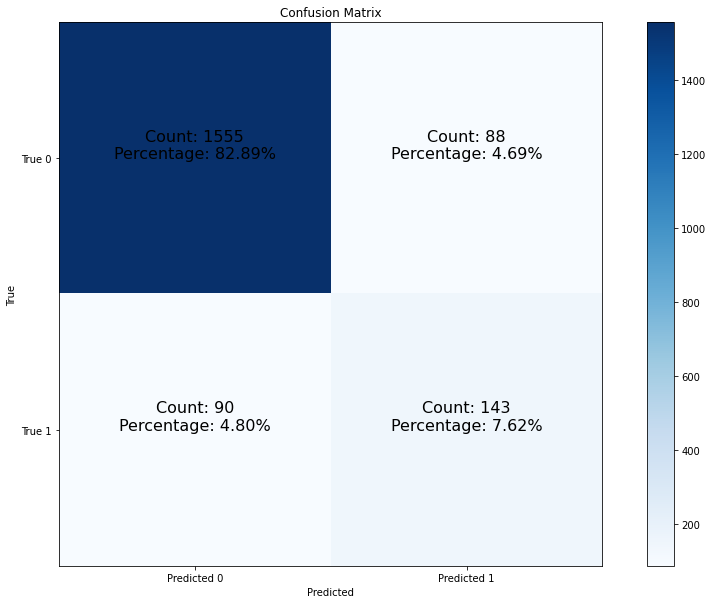

ROC AUC: 0.7800866728140452
Accuracy: 0.9051172707889126
Recall: 0.6137339055793991


In [ ]:
rf_mod_2017_4, rf_pred_2017_4 = create_model(model='rf',training=train_data, testing=test_data, prob_threshold=0.1)

report_metrics('rf',rf_mod_2017_4,rf_pred_2017_4,train_data,test_data)


## 5. + Revenue Transformation

In [ ]:
model_df = df_enigma_filled

revolving_flag = False
if revolving_flag==False:
    model_df = model_df.filter(f.col('RevolverStatus')==0)
    model_df = model_df.drop('RevolverStatus')
    model_df = model_df.filter(f.col('ApprovalDate')>date(2017,1,1))

remove_cols = ['BorrName','BorrStreet','BorrCity','BorrZip','BankName','BankFDICNumber','BankNCUANumber','BankStreet',
              'BankCity','BankState','BankZip','ApprovalFiscalYear','FirstDisbursementDate','NaicsCode',
              'NaicsDescription','FranchiseCode','FranchiseName','ProjectCounty','ProjectState','SBADistrictOffice',
              'CongressionalDistrict','BusinessAge','PaidInFullDate','ChargeOffDate','GrossChargeOffAmount', 'SOLDSECMRTIND',
              'entity_id', 'est_maturity_date','actual_maturity_date', 'Borr_lat','Borr_lng','Borr_county_fips','Borr_county_name',
              'JobsSupported','ApprovalDate','naics_2_desc','ruca_description','InitialInterestRate']


remove_cols.extend(['diff_est_actual_maturity_date','T_0y_naics_county_gdp_per_capita','T_0y_naics_county_avg_income',
                    'T_0y_naics_county_diff_gdp_vs_state_avg','T_1y_prior_naics_county_gdp_per_capita','T_1y_prior_naics_county_avg_income','T_1y_prior_naics_county_diff_gdp_vs_state_avg'])

remove_cols.extend(['T_0m_approval_date_revenue','T_1m_future_revenue','T_2m_future_revenue','T_3m_future_revenue','T_4m_future_revenue','T_5m_future_revenue','T_6m_future_revenue','T_7m_future_revenue','T_8m_future_revenue','T_9m_future_revenue','rev_growth_3m_future','T_1m_prior_revenue','T_2m_prior_revenue','T_7m_prior_revenue','T_8m_prior_revenue','T_9m_prior_revenue','rev_growth_9m_4m_prior','T_3m_prior_revenue','pct_revenue_to_loan_amount','rev_growth_3m_prior'])

remove_cols.extend(['earliest_revenue_record','total_business_locations','has_us_website','has_international_website','bankruptcy_flag','ucc_filing_count'])

model_df = remove_columns(model_df)

model_df = model_df.na.drop()

pif = model_df.filter(model_df["LoanStatus"]==0)
chargeoff = model_df.filter(model_df["LoanStatus"]==1)

train0, test0 = pif.randomSplit([0.8,0.2], seed=42)
train1, test1 = chargeoff.randomSplit([0.6,0.4], seed=42)

train_data = train0.union(train1)
test_data = test0.union(test1)

for i in train_data.columns:
    print(i)

ruca_id
naics_2
BorrState
GrossApproval
SBAGuaranteedApproval
DeliveryMethod
subpgmdesc
TermInMonths
BusinessType
LoanStatus
pct_gov_secured
BankCity_eq_BorrCity_flag
BankState_eq_BorrState_flag
BankZip_eq_BorrZip_flag
days_to_disbursement
franchise_flag
naics_3
Borr_military_county_flag
total_inflation_pct
T_4m_prior_revenue
T_5m_prior_revenue
T_6m_prior_revenue
months_revenue_before_approval
total_active_months
pct_revenue_to_monthly_payment
rev_growth_6m_4m_prior


2023/09/15 23:24:51 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'bedacc87fd8244a6b28632281df48bbd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/09/15 23:25:01 WARNING mlflow.utils: Truncated the value of the key `VectorAssembler.inputCols`. Truncated value: `['GrossApproval', 'SBAGuaranteedApproval', 'TermInMonths', 'pct_gov_secured', 'BankCity_eq_BorrCity_flag', 'BankState_eq_BorrState_flag', 'BankZip_eq_BorrZip_flag', 'days_to_disbursement', 'franchise_flag', 'Borr_military_county_flag', 'total_inflation_pct', 'T_4m_prior_revenue', 'T_5m_prior_revenue', 'T_6m_prior_revenue', 'months_revenue_before_approval', 'total_active_months', 'pct_revenue_to_monthly_payment', 'rev_growth_6m_4m_prior', 'ruca_id_encoded', 'DeliveryMethod_encoded', 'subpgmdes...`
2023/09/15 23:25:02 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/local_disk

2023/09/15 23:52:08 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false
2023/09/15 23:52:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Feature 'BankCity_eq_BorrCity_flag': Importance = 0.2043
Feature 'franchise_flag': Importance = 0.1948
Feature 'BorrState': Importance = 0.1610
Feature 'naics_3': Importance = 0.1221
Feature 'ruca_id': Importance = 0.0471
Feature 'naics_2': Importance = 0.0292
Feature 'GrossApproval': Importance = 0.0286
Feature 'days_to_disbursement': Importance = 0.0268
Feature 'Borr_military_county_flag': Importance = 0.0233
Feature 'BankState_eq_BorrState_flag': Importance = 0.0208
Feature 'TermInMonths': Importance = 0.0193
Feature 'BankZip_eq_BorrZip_flag': Importance = 0.0185
Feature 'total_inflation_pct': Importance = 0.0118
Feature 'DeliveryMethod': Importance = 0.0100
Feature 'T_6m_prior_revenue': Importance = 0.0048
Feature 'T_4m_prior_revenue': Importance = 0.0036
Feature 'BusinessType': Importance = 0.0033
Feature 'T_5m_prior_revenue': Importance = 0.0023
Feature 'SBAGuaranteedApproval': Importance = 0.0019
Feature 'subpgmdesc': Importance = 0.0015
Feature 'total_active_months': Importance

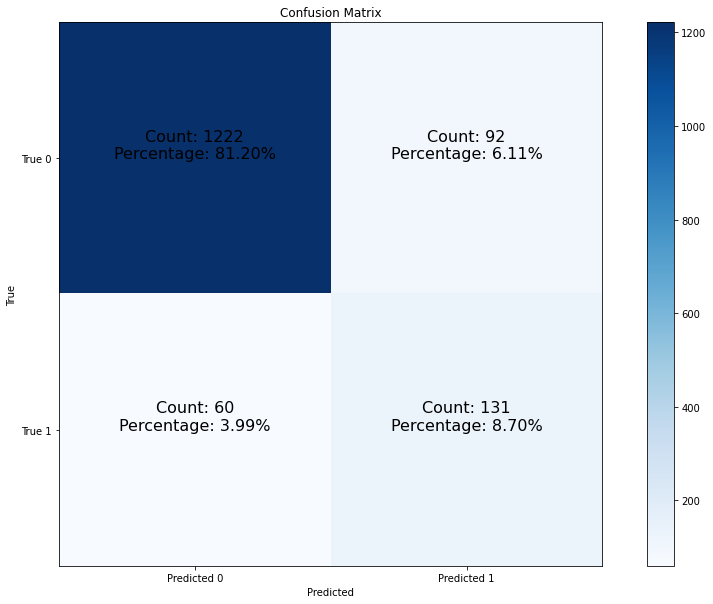

ROC AUC: 0.8079243268226987
Accuracy: 0.8990033222591363
Recall: 0.6858638743455497


In [ ]:
rf_mod_2017_5, rf_pred_2017_5 = create_model(model='rf',training=train_data, testing=test_data, prob_threshold=0.1)

report_metrics('rf',rf_mod_2017_5,rf_pred_2017_5,train_data,test_data)


## 6. Closing Revenue Gap

In [ ]:
model_df = df_enigma_filled

revolving_flag = False
if revolving_flag==False:
    model_df = model_df.filter(f.col('RevolverStatus')==0)
    model_df = model_df.drop('RevolverStatus')
    model_df = model_df.filter(f.col('ApprovalDate')>date(2017,1,1))

remove_cols = ['BorrName','BorrStreet','BorrCity','BorrZip','BankName','BankFDICNumber','BankNCUANumber','BankStreet',
              'BankCity','BankState','BankZip','ApprovalFiscalYear','FirstDisbursementDate','NaicsCode',
              'NaicsDescription','FranchiseCode','FranchiseName','ProjectCounty','ProjectState','SBADistrictOffice',
              'CongressionalDistrict','BusinessAge','PaidInFullDate','ChargeOffDate','GrossChargeOffAmount', 'SOLDSECMRTIND',
              'entity_id', 'est_maturity_date','actual_maturity_date', 'Borr_lat','Borr_lng','Borr_county_fips','Borr_county_name',
              'JobsSupported','ApprovalDate','naics_2_desc','ruca_description','InitialInterestRate']


remove_cols.extend(['diff_est_actual_maturity_date','T_0y_naics_county_gdp_per_capita','T_0y_naics_county_avg_income',
                    'T_0y_naics_county_diff_gdp_vs_state_avg','T_1y_prior_naics_county_gdp_per_capita','T_1y_prior_naics_county_avg_income','T_1y_prior_naics_county_diff_gdp_vs_state_avg'])

remove_cols.extend(['T_1m_future_revenue','T_2m_future_revenue','T_3m_future_revenue','T_4m_future_revenue','T_5m_future_revenue','T_6m_future_revenue','T_7m_future_revenue','T_8m_future_revenue','T_9m_future_revenue','rev_growth_3m_future','T_7m_prior_revenue','T_8m_prior_revenue','T_9m_prior_revenue','rev_growth_9m_4m_prior','pct_revenue_to_loan_amount'])

remove_cols.extend(['earliest_revenue_record','total_business_locations','has_us_website','has_international_website','bankruptcy_flag','ucc_filing_count'])

model_df = remove_columns(model_df)

model_df = model_df.na.drop()

pif = model_df.filter(model_df["LoanStatus"]==0)
chargeoff = model_df.filter(model_df["LoanStatus"]==1)

train0, test0 = pif.randomSplit([0.8,0.2], seed=42)
train1, test1 = chargeoff.randomSplit([0.6,0.4], seed=42)

train_data = train0.union(train1)
test_data = test0.union(test1)

for i in train_data.columns:
    print(i)

ruca_id
naics_2
BorrState
GrossApproval
SBAGuaranteedApproval
DeliveryMethod
subpgmdesc
TermInMonths
BusinessType
LoanStatus
pct_gov_secured
BankCity_eq_BorrCity_flag
BankState_eq_BorrState_flag
BankZip_eq_BorrZip_flag
days_to_disbursement
franchise_flag
naics_3
Borr_military_county_flag
total_inflation_pct
T_0m_approval_date_revenue
T_1m_prior_revenue
T_2m_prior_revenue
T_3m_prior_revenue
T_4m_prior_revenue
T_5m_prior_revenue
T_6m_prior_revenue
months_revenue_before_approval
total_active_months
pct_revenue_to_monthly_payment
rev_growth_3m_prior
rev_growth_6m_4m_prior


2023/09/17 21:11:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '42879c1426504a8fb5a1fe3da453306e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/09/17 21:11:53 WARNING mlflow.utils: Truncated the value of the key `VectorAssembler.inputCols`. Truncated value: `['GrossApproval', 'SBAGuaranteedApproval', 'TermInMonths', 'pct_gov_secured', 'BankCity_eq_BorrCity_flag', 'BankState_eq_BorrState_flag', 'BankZip_eq_BorrZip_flag', 'days_to_disbursement', 'franchise_flag', 'Borr_military_county_flag', 'total_inflation_pct', 'T_0m_approval_date_revenue', 'T_1m_prior_revenue', 'T_2m_prior_revenue', 'T_3m_prior_revenue', 'T_4m_prior_revenue', 'T_5m_prior_revenue', 'T_6m_prior_revenue', 'months_revenue_before_approval', 'total_active_months', 'pct_revenue_to_mon...`
2023/09/17 21:11:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/local_disk

2023/09/17 21:39:13 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false
2023/09/17 21:39:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Feature 'BankCity_eq_BorrCity_flag': Importance = 0.1886
Feature 'T_0m_approval_date_revenue': Importance = 0.1809
Feature 'BorrState': Importance = 0.1520
Feature 'T_1m_prior_revenue': Importance = 0.1216
Feature 'ruca_id': Importance = 0.0397
Feature 'naics_2': Importance = 0.0336
Feature 'GrossApproval': Importance = 0.0255
Feature 'total_inflation_pct': Importance = 0.0245
Feature 'T_3m_prior_revenue': Importance = 0.0205
Feature 'BankState_eq_BorrState_flag': Importance = 0.0198
Feature 'franchise_flag': Importance = 0.0187
Feature 'days_to_disbursement': Importance = 0.0182
Feature 'TermInMonths': Importance = 0.0178
Feature 'BankZip_eq_BorrZip_flag': Importance = 0.0153
Feature 'T_2m_prior_revenue': Importance = 0.0132
Feature 'T_4m_prior_revenue': Importance = 0.0119
Feature 'Borr_military_county_flag': Importance = 0.0112
Feature 'naics_3': Importance = 0.0097
Feature 'DeliveryMethod': Importance = 0.0082
Feature 'T_5m_prior_revenue': Importance = 0.0045
Feature 'BusinessType'

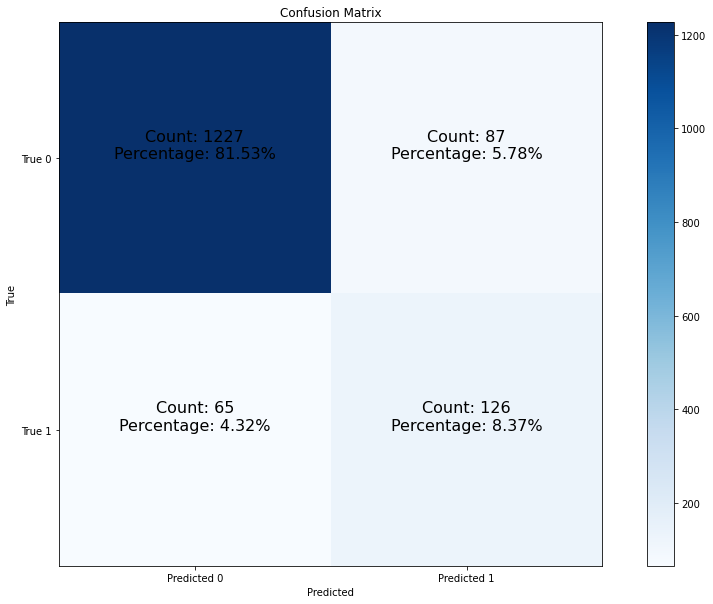

ROC AUC: 0.7967379091061225
Accuracy: 0.8990033222591363
Recall: 0.6596858638743456
Recall: 0.6596858638743456


---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2879045648664632>:9
      6 recall = evaluator3.evaluate(rf_pred_2017_gap, {evaluator3.metricLabel: 1.0})
      7 print("Recall:", recall)
----> 9 tp = predictions.filter((rf_pred_2017_gap.LoanStatus == 1) & (rf_pred_2017_gap.prediction == 1)).count()
     10 tn = predictions.filter((rf_pred_2017_gap.LoanStatus == 0) & (rf_pred_2017_gap.prediction == 0)).count()
     11 fp = predictions.filter((rf_pred_2017_gap.LoanStatus == 0) & (rf_pred_2017_gap.prediction == 1)).count()

NameError: name 'predictions' is not defined

In [ ]:
rf_mod_2017_gap, rf_pred_2017_gap = create_model(model='rf',training=train_data, testing=test_data, prob_threshold=0.1)

report_metrics('rf',rf_mod_2017_gap,rf_pred_2017_gap,train_data,test_data)



## 7. Full Revenue Card

2023/09/15 00:35:28 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '782b54982e1d42b6a40ba74c32a2f536', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2023/09/15 00:35:39 WARNING mlflow.utils: Truncated the value of the key `VectorAssembler.inputCols`. Truncated value: `['GrossApproval', 'SBAGuaranteedApproval', 'TermInMonths', 'JobsSupported', 'pct_gov_secured', 'BankCity_eq_BorrCity_flag', 'BankState_eq_BorrState_flag', 'BankZip_eq_BorrZip_flag', 'days_to_disbursement', 'diff_est_actual_maturity_date', 'franchise_flag', 'Borr_military_county_flag', 'total_inflation_pct', 'T_0m_approval_date_revenue', 'T_1m_prior_revenue', 'T_1m_future_revenue', 'T_2m_prior_revenue', 'T_2m_future_revenue', 'T_3m_prior_revenue', 'T_3m_future_revenue', 'T_4m_prior_revenue', '...`
2023/09/15 00:35:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/local_disk

2023/09/15 01:02:28 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false
2023/09/15 01:03:10 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils."


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Feature 'T_9m_future_revenue': Importance = 0.1641
Feature 'BorrState': Importance = 0.1522
Feature 'JobsSupported': Importance = 0.1052
Feature 'naics_2': Importance = 0.0346
Feature 'SBAGuaranteedApproval': Importance = 0.0324
Feature 'BankState_eq_BorrState_flag': Importance = 0.0275
Feature 'T_5m_prior_revenue': Importance = 0.0246
Feature 'ruca_id': Importance = 0.0234
Feature 'T_6m_prior_revenue': Importance = 0.0222
Feature 'T_2m_prior_revenue': Importance = 0.0187
Feature 'T_6m_future_revenue': Importance = 0.0185
Feature 'T_8m_future_revenue': Importance = 0.0184
Feature 'total_business_locations': Importance = 0.0180
Feature 'T_1m_prior_revenue': Importance = 0.0149
Feature 'T_4m_prior_revenue': Importance = 0.0149
Feature 'naics_3': Importance = 0.0148
Feature 'days_to_disbursement': Importance = 0.0141
Feature 'GrossApproval': Importance = 0.0131
Feature 'T_0m_approval_date_revenue': Importance = 0.0127
Feature 'has_international_website': Importance = 0.0126
Feature 'Borr_

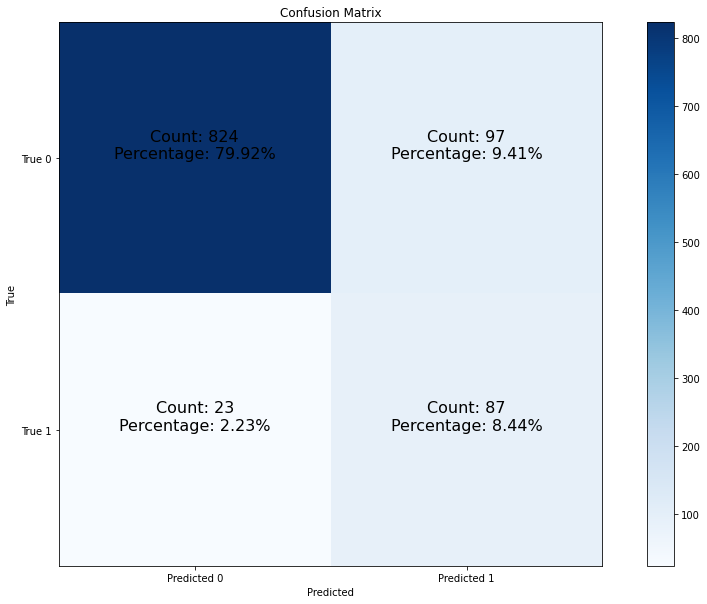

ROC AUC: 0.8427943934458592
Accuracy: 0.88360814742968
Recall: 0.7909090909090909


In [ ]:
rf_mod_2017_6, rf_pred_2017_6 = create_model(model='rf',training=train_data, testing=test_data, prob_threshold=0.1)

report_metrics('rf',rf_mod_2017_6,rf_pred_2017_6,train_data,test_data)